<a href="https://colab.research.google.com/github/e-paj/M2M_Tech/blob/main/Bokeh_Advanced_Layouts_and_Interactivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Bokeh Layouts and Interactivity

Now we will look at some of the more advanced options available to us for creating dashboard layouts and interactive charts with Bokeh.

For this notebook we will act as analysts of US election data. The 2020 US Presedential election was the largest to date with over 150 million votes cast. That's a lot of data collected! If you were watching the news at all during this election you will have seen some of the cool interactive US map data visualizations the newscasters used. These visualizations and others surrounding the election are type we will try to replicate in the coming workshops.

Our end-goal will be to deploy our visualizations to our own custom websites, as seen here: https://tech-bytes-2020-bokeh-vis.netlify.app/!



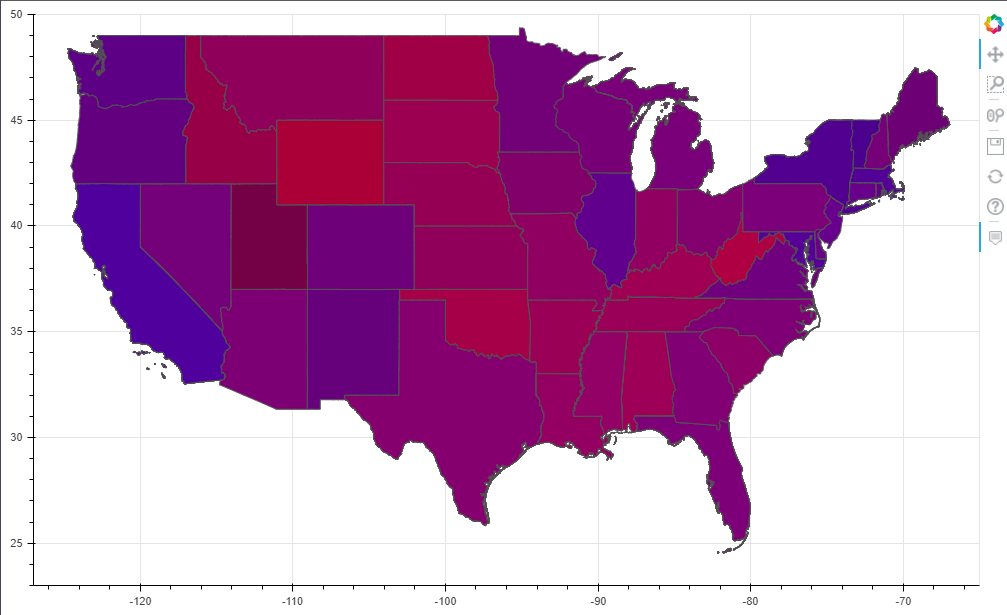

To start, we'll load up our US election data into a Pandas Dataframe. This CSV contains election data by state from 1976 to 2016. There are many columns so we'll just pick out the ones we need. We'll also ensure the years are interpreted as strings because this will make it easier to use them as categorical data in our visualizations.

> The data was sourced from [here](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/42MVDX).

In [ ]:
import pandas as pd

cols = ['year', 'state', 'candidate', 'party', 'candidatevotes', 'totalvotes']
elections_data = pd.read_csv('1976-2016-president.csv', usecols=cols, dtype={'year': str})
elections_data

,year,state,candidate,party,candidatevotes,totalvotes
0,1976,Alabama,"Carter, Jimmy",democrat,659170,1182850
1,1976,Alabama,"Ford, Gerald",republican,504070,1182850
2,1976,Alabama,"Maddox, Lester",american independent party,9198,1182850
3,1976,Alabama,"Bubar, Benjamin """"Ben""""",prohibition,6669,1182850
4,1976,Alabama,"Hall, Gus",communist party use,1954,1182850
...,...,...,...,...,...,...
3735,2016,Wyoming,NaN,NaN,6904,258788
3736,2016,Wyoming,NaN,independent,3224,258788
3737,2016,Wyoming,Blank Vote,NaN,2661,258788
3738,2016,Wyoming,"Castle, Darrell L.",constitution party,2042,258788


Let's check for nulls and also look at the data types of our columns.

In [ ]:
elections_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3740 entries, 0 to 3739
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   year            3740 non-null   object
 1   state           3740 non-null   object
 2   candidate       3474 non-null   object
 3   party           3404 non-null   object
 4   candidatevotes  3740 non-null   int64 
 5   totalvotes      3740 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 175.4+ KB


We're missing some data in the `candidate` and `party` columns so we'll have to watch out for that. Otherwise, the data types are as we expect so that's good.

In the US, there are groups called "parties" which are elected to lead the country. There are many different parties, but the Democrat and Republican parties eclipse all the others, so much so that we don't really need to spend time looking at the others.

So here we filter out all results from parties which are not one of the main two.

In [ ]:
party = elections_data['party']
dem_rep_data = elections_data[(party == 'democrat') | (party == 'republican')]
dem_rep_data

,year,state,candidate,party,candidatevotes,totalvotes
0,1976,Alabama,"Carter, Jimmy",democrat,659170,1182850
1,1976,Alabama,"Ford, Gerald",republican,504070,1182850
7,1976,Alaska,"Ford, Gerald",republican,71555,123574
8,1976,Alaska,"Carter, Jimmy",democrat,44058,123574
11,1976,Arizona,"Ford, Gerald",republican,418642,742719
...,...,...,...,...,...,...
3719,2016,West Virginia,"Clinton, Hillary",democrat,188794,713051
3723,2016,Wisconsin,"Trump, Donald J.",republican,1405284,2976150
3724,2016,Wisconsin,"Clinton, Hillary",democrat,1382536,2976150
3732,2016,Wyoming,"Trump, Donald J.",republican,174419,258788


## Advanced Layouts

Now let's start with our visualizations. Our goal is to visualize which party each state has leaned towards over the years. To do this we'll use stacked bar graphs.

To make things easier on ourselves, we'll start by just visualizing the data for one state, then we'll worry about how we can do it for all states at once later.

In [ ]:
states = dem_rep_data.groupby('state')
alabama = states.get_group('Alabama')
alabama

,year,state,candidate,party,candidatevotes,totalvotes
0,1976,Alabama,"Carter, Jimmy",democrat,659170,1182850
1,1976,Alabama,"Ford, Gerald",republican,504070,1182850
332,1980,Alabama,"Reagan, Ronald",republican,654192,1341929
333,1980,Alabama,"Carter, Jimmy",democrat,636730,1341929
696,1984,Alabama,"Reagan, Ronald",republican,872849,1441713
697,1984,Alabama,"Mondale, Walter",democrat,551899,1441713
1019,1988,Alabama,"Bush, George H.W.",republican,815576,1378476
1020,1988,Alabama,"Dukakis, Michael",democrat,549506,1378476
1304,1992,Alabama,"Bush, George H.W.",republican,804283,1688060
1305,1992,Alabama,"Clinton, Bill",democrat,690080,1688060


We need our standard Bokeh imports.

In [ ]:
from bokeh.plotting import figure, output_notebook, show

output_notebook()

Now we'll create a figure for our stacked bar graph, where the election years are on the x-axis.

In [ ]:
years = alabama['year'].unique()
# unique calls for unique values in 'year' and returns an array

alabama_fig = figure(x_range=years)

Next we need the data to put on the y-axis. This data should contain the total votes for each party, so we'll gather the unique parties (Democrat and Republican) and get the total votes for each of their candidates in each year.

In [ ]:
parties = alabama['party'].unique()
party_votes = alabama.groupby('party')['candidatevotes']
print(parties)

['democrat' 'republican']


Now we'll create the data source for Bokeh to use to create the stacked bar chart. This data source is a dictionary with the party names as keys and the total votes for that party as values. We also need to add the years as a key-value pair so that Bokeh knows where to put the data along the x-axis.

In [ ]:
data = {party: party_votes.get_group(party) for party in parties}
data['year'] = years
print(data)
alabama_fig.vbar_stack(parties, x='year', color=['blue', 'red'], width=0.8, source=data)

show(alabama_fig)

{'democrat': 0       659170
333     636730
697     551899
1020    549506
1305    690080
1675    662165
2043    692611
2412    693933
2729    813479
3080    795696
3396    729547
Name: candidatevotes, dtype: int64, 'republican': 1        504070
332      654192
696      872849
1019     815576
1304     804283
1674     769044
2042     941173
2411    1176394
2728    1266546
3079    1255925
3395    1318255
Name: candidatevotes, dtype: int64, 'year': array(['1976', '1980', '1984', '1988', '1992', '1996', '2000', '2004',
       '2008', '2012', '2016'], dtype=object)}


And there's our plot! Now we can see that Alabama has leaned towards the Republican party for the most part.

Now let's apply this technique to create a plot for every state. We can do this by creating a figure for each state and putting them all into a grid layout.

In [ ]:
import math
from bokeh.layouts import gridplot

state_names = list(states.groups.keys())
num_cols = math.floor(math.sqrt(len(state_names)))
grid_figs = [None] * len(state_names)
parties = ['democrat', 'republican']

for i, state_name in enumerate(state_names):
    state_data = states.get_group(state_name)

    years = state_data['year'].unique()

    state_fig = figure(x_range=years, title=state_name.capitalize(),
                         tooltips="$name total votes: @$name")
    state_fig.xaxis.major_label_orientation = math.pi / 4

    party_votes = state_data.groupby('party')['candidatevotes']
    data = {party: party_votes.get_group(party) for party in parties}
    data['year'] = years
    state_fig.vbar_stack(parties, x='year', color=['blue', 'red'], width=0.8,
                         source=data, legend_label=list(parties))
    state_fig.legend.location = 'top_left'

    grid_figs[i] = state_fig

grid = gridplot(grid_figs, ncols=num_cols, width=300, height=300)
show(grid)

In [ ]:
## another way

# import math ## to use pi to rotate xaxis orientation
# from bokeh.layouts import gridplot

## loop through all of the states

# states = dem_rep_data.groupby('state') # this is from the code above, no need to this twice

# state_names = list(states.groups.keys())
# plots = []

# for state_name in state_names:
#     state_data = states.get_group('state_name')

#     years = state_data['year].unique()

#     state_fig = figure(title = state_name.capitalize(), x_range=years,
#                         tooltips = '$name total votes: @$name') ## where we can add the name of each state capitalized
#     state_fig.xaxis.major_label_orientation = math.pi/4 ## 45 degree rotation for years on xaxis label as not enough space horizontally

#     parties = state_data['party'].unique() ## to make order consistent use: parties = ['democrat','republican']
#     party_votes = state_data.groupby('party')['candidatevotes']

#     data = {party: party_votes.get_group(party) for party in parties}
#     data['year'] = years

#     state_fig.vbar_stack(parties, x='year', width=0.8, color=['blue','red'],
#                           source=data, legend_label = list(parties))
#     state_fig.legend.location = 'top_left'

#     plots.append(state_fig)

## to make the grid a perfect square

# num_cols = math.floor(math.sqrt(len(state_names))) ## flooring returns an integer by rounding it twoards zero
# grid = gridplot(plots,ncols=num_cols, width=300, height=300)
# show(grid)


Now we have a cool dashboard where we can see all of the state data at once! There a few things to note here:

- Notice how Bokeh automatically determined how many rows we need after we gave it the number of columns.
- Also notice how each plot gets its own interactive hover tool.

**Challenge**: Change the above layout so that each row of plots fits in your window.

**Challenge**: Change the above plots to instead show the percentage of the total votes won by each party.

In [ ]:
# my answer

# 1st Challenge
# copying the codes above, I changed the number of cols to show to 3

# 2nd Challenge
# To calculate the percentage, get the total votes of each party and divide candidate votes from it.
# Since Bokeh does not allow us to do calculation by itself, we have to do so inside the dictionary

import math
from bokeh.layouts import gridplot

state_names = list(states.groups.keys())
grid_figs = [None] * len(state_names)
parties = ['democrat', 'republican']

for i, state_name in enumerate(state_names):
    state_data = states.get_group(state_name)

    years = state_data['year'].unique()

    state_fig = figure(x_range=years, title=state_name.capitalize(),
                         tooltips="$name total votes: @$name")
    state_fig.xaxis.major_label_orientation = math.pi / 4

    party_votes = state_data.groupby('party')['candidatevotes']
    total_votes = state_data.groupby('party')['totalvotes']

    data = {party: party_votes.get_group(party)/ total_votes.get_group(party) *100 for party in parties}
    data['year'] = years
    state_fig.vbar_stack(parties, x='year', color=['blue', 'red'], width=0.8,
                         source=data, legend_label=list(parties))
    state_fig.legend.location = 'top_left'

    grid_figs[i] = state_fig

grid = gridplot(grid_figs, ncols=3, width=300, height=300)
show(grid)

## Advanced Interactivity

Next let's say we want to see the trend towards/away from the Democrat party over time by state. To do this we can plot the percent of the total votes for each state the Democrat party got for each year in a line chart.

In [ ]:
from bokeh.palettes import cividis
from bokeh.models import CrosshairTool

palette = cividis(len(states))
p = figure(tooltips='$name @x: @y%',
           title='Democrat percent of total vote by state',
           x_range=years)
state_lines = {}

for i, group in enumerate(states.groups):
    state_data = states.get_group(group)
    party_data = state_data[state_data['party'] == 'democrat']
    percentages = party_data['candidatevotes'] / party_data['totalvotes'] * 100

    line = p.line(x=party_data['year'], y=percentages, color=palette[i],
                  name=group)
    state_lines[group] = line

p.add_tools(CrosshairTool())
show(p)

In [ ]:
# another way

states = dem_rep_data.groupby('state')

from bokeh.palettes import cividis
from bokeh.models import CrosshairTool

palette = cividis(len(states))

p = figure(title = "Democrat percent of total vote by state", x_range=years,
           tooltips='$name @x: @y%')
state_lines = {} # done for widgets

for i, group in enumerate(states.groups):
  state_data = states.get_group(group)
  party_data = state_data[state_data['party'] == 'democrat'] ## filter to get only democrat votes
  percentages = party_data['candidatevotes'] / party_data['totalvotes'] * 100

  line = p.line(x=party_data['year'], y = percentages, name=group, color=palette[i])
  state_lines[group] = line

p.add_tools(CrosshairTool())
show(p)

The above plot is very difficult to read, so let's use some widgets to interactively choose the states and years we want to view.


We start by making all the lines invisible by default, then we'll interactively toggle the ones we want back on later.

In [ ]:
for state_line in state_lines.values():
    state_line.visible = False

show(p)

Next we'll add our widgets. To do this we import from `ipywidgets`, which provides widgets (e.g. text inputs) specifically for Python notebooks.

In [ ]:
from ipywidgets import interact, SelectMultiple, IntRangeSlider

Then we show our plot with Bokeh, but we have to also add the `notebook_handle` argument and save the return value for later.

After we have shown our plot, we can add widgets by creating them and passing them to the `interact` decorator, which sits above a function which should be called each time the widget changes.


> Note: the plot updates may work inconsistently, if you're having issues first try re-running this cell, and if that doesn't work try reopening this notebook in an incognito window. You can also try another browser if those steps don't work.

In [ ]:
from bokeh.io import push_notebook

# Challenge code
# initial_states = ['Hawaii', 'Washington']
# for state in initial_states:
#     state_lines[state].visible = True

handle = show(p, notebook_handle=True)

states_select = SelectMultiple(
    options=states.groups.keys(),
    rows=10,
    description='Show states (use ctrl or shift to select multiple):',
    # Challenge code
    # value=initial_states
)
@interact(states=states_select)
def update(states):
    for state_line_name, state_line in state_lines.items():
        if state_line_name in states:
            state_line.visible = True
        else:
            state_line.visible = False
    push_notebook(handle=handle)

min_year = int(years[0])
max_year = int(years[-1])
year_range = IntRangeSlider(
    value=[min_year, max_year],
    min=min_year,
    max=max_year,
    step=4,
    description='Select year range:',
    # continuous_update=False,
    )
@interact(years=year_range)
def update(years):
    x_years = range(years[0], years[1] + 1, 4)
    p.x_range.factors = list(map(str, x_years))
    push_notebook(handle=handle)

interactive(children=(SelectMultiple(description='Show states (use ctrl or shift to select multiple):', option…

interactive(children=(IntRangeSlider(value=(1976, 2016), description='Select year range:', max=2016, min=1976,…

In [ ]:
# going with the prof

from bokeh.io import push_notebook

handle = show(p, notebook_handle = True)

states_select = SelectMultiple(
    options=state_lines.keys(),
    rows=10,
    description='Show states (use ctrl or shift to select multiple)'
)

@interact(states=states_select)
def update(states):
  for state_line_name, state_line in state_lines.items():
    if state_line_name in states:
      state_line.visible = True
    else:
      state_line.visible = False

  push_notebook(handle=handle)

min_year = int(years[0])
max_year = int(years[-1])

year_range = IntRangeSlider(
    value = [min_year, max_year],
    min = min_year,
    max = max_year,
    step = 4 # to make sure no values of 1977, 2001, or etc. gets pick election happens every 4 years
)

@interact(years=year_range)
def update(years):
  x_years = range(years[0],years[1]+1, 4 )
  # mapping to convert values into strings then putting it in a list
  p.x_range.factors = list(map(str,x_years))
  push_notebook(handle=handle)



interactive(children=(SelectMultiple(description='Show states (use ctrl or shift to select multiple)', options…

interactive(children=(IntRangeSlider(value=(1976, 2016), description='years', max=2016, min=1976, step=4), Out…

interactive(children=(Valid(value=False, description='Valid!'), Output()), _dom_classes=('widget-interact',))

In [ ]:
# example of using widgets (very simple)

@interact(x=['value1','value2'],y=1.0)
def g(x,y):
  print('Values:', x,y)


interactive(children=(Dropdown(description='x', options=('value1', 'value2'), value='value1'), FloatSlider(val…

**Challenge**: Look at the [SelectMultiple](https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html#SelectMultiple) documentation and figure out how to have Hawaii and Washington selected by default in the above plot.

**Challenge**: Add another widget of your choice to the above plot. It doesn't have to make sense with the plot but bonus points if it does! Here is the list of widgets: https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html.

In [ ]:
# my answer

# 1st challenge
states_select = SelectMultiple(
    value = ['Hawaii','Washington'],
    options=state_lines.keys(),
    rows=10,
    description='Show states (use ctrl or shift to select multiple)'
)

# 2nd challenge

from ipywidgets import Valid

validity = Valid(
    value = False,
    description = 'Valid!'
)
@interact(valid=validity)
def update(valid):
  print(valid)
